In [171]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler


In [172]:
stock= pd.read_csv('stock.csv', parse_dates=True, index_col=0)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
                Open      High       Low     Close        Volume
Date                                                            
2018-08-23  10817.33  10863.13  10802.79  10863.13           NaN
2018-08-22  10790.24  10828.21  10774.69  10804.20  2.039766e+09
2018-08-21  10697.01  10792.20  10697.01  10792.20  1.995001e+09
2018-08-20  10698.76  10729.90  10663.44  10699.05  2.087036e+09
2018-08-17  10702.60  10757.01  10688.55  10690.96  2.096415e+09


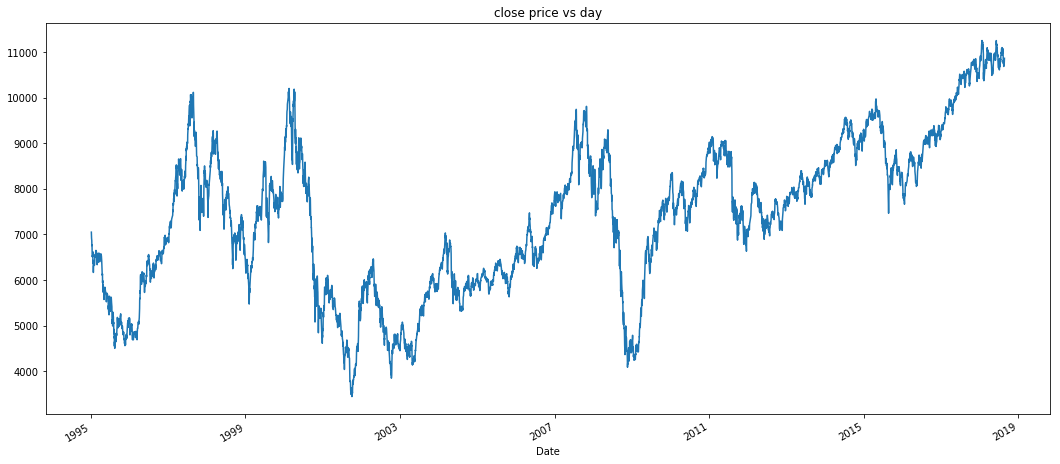

In [173]:
print(stock.columns)
print(stock.head())
stock.loc[:]['Close'].plot(figsize=(18, 8), title='close price vs day')

                Open      High       Low     Close        Volume
Date                                                            
2018-08-23  10817.33  10863.13  10802.79  10863.13           NaN
2018-08-22  10790.24  10828.21  10774.69  10804.20  2.039766e+09
2018-08-21  10697.01  10792.20  10697.01  10792.20  1.995001e+09
2018-08-20  10698.76  10729.90  10663.44  10699.05  2.087036e+09
2018-08-17  10702.60  10757.01  10688.55  10690.96  2.096415e+09
               Open     High      Low    Close  Volume
Date                                                  
1995-01-05  7129.94  7144.70  7040.72  7051.49     NaN
1995-01-06  7086.88  7086.88  6884.61  6919.31     NaN
1995-01-07  6948.27  6948.27  6855.55  6915.40     NaN
1995-01-09  6948.73  6959.74  6869.08  6869.08     NaN
1995-01-10  6817.85  6838.95  6706.67  6756.88     NaN


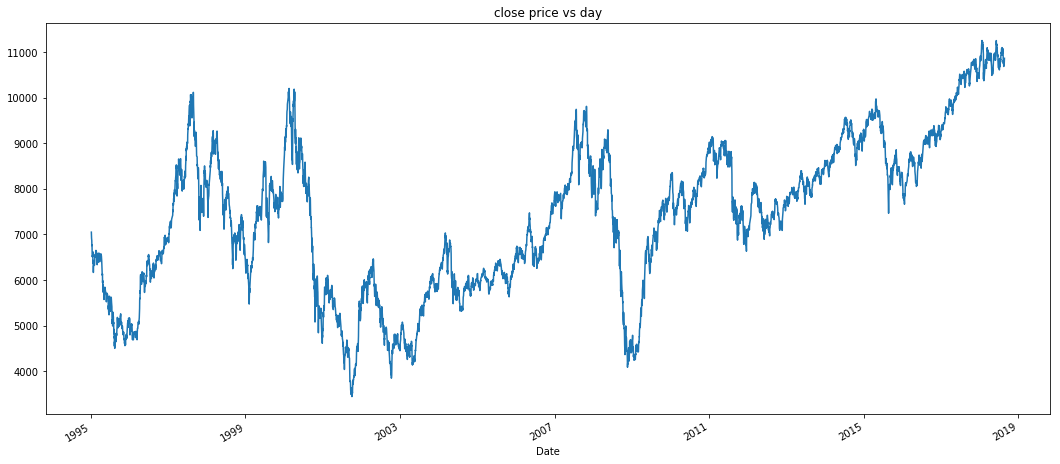

In [174]:
print(stock.head())
stock = stock.sort_index(ascending=True, axis=0)
stock.loc[:]['Close'].plot(figsize=(18, 8), title='close price vs day')
print(stock.head())

In [175]:
print(stock)

                Open      High       Low     Close        Volume
Date                                                            
1995-01-05   7129.94   7144.70   7040.72   7051.49           NaN
1995-01-06   7086.88   7086.88   6884.61   6919.31           NaN
1995-01-07   6948.27   6948.27   6855.55   6915.40           NaN
1995-01-09   6948.73   6959.74   6869.08   6869.08           NaN
1995-01-10   6817.85   6838.95   6706.67   6756.88           NaN
1995-01-11   6736.11   6791.05   6720.07   6777.24           NaN
1995-01-12   6749.62   6749.62   6571.93   6609.50           NaN
1995-01-13   6673.26   6685.93   6582.05   6582.40           NaN
1995-01-14   6565.52   6565.52   6450.79   6511.30           NaN
1995-01-16   6556.98   6556.98   6473.06   6536.65           NaN
1995-01-17   6564.25   6574.77   6487.73   6515.79           NaN
1995-01-18   6558.74   6638.41   6546.99   6623.52           NaN
1995-01-19   6635.62   6672.63   6598.02   6598.02           NaN
1995-01-20   6572.85   65

In [176]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb)])
    return np.array(X),np.array(Y)

In [177]:
window_size = 30
config_epochs = 80
config_lstm_size = 128

In [178]:
#print(stock['Close'])
#print(stock['Close'].values)
scl = MinMaxScaler(feature_range=(0, 1))
#Scale the data
closes = stock['Close'].values
closes = closes.reshape(closes.shape[0],1)
closes = scl.fit_transform(closes)
print(closes)
X,y = processData(closes, window_size)

[[0.46180342]
 [0.44487213]
 [0.44437129]
 ...
 [0.94096082]
 [0.94249793]
 [0.95004643]]


In [179]:
print(len(stock))
print(len(X))

5922
5891


In [180]:
stock_split_index = len(X) - 40
print(stock_split_index)
X_train,X_test = X[:stock_split_index],X[stock_split_index:]
y_train,y_test = y[:stock_split_index],y[stock_split_index:]
print(len(X_train))
print(len(X_test))

5851
5851
40


In [181]:
model = Sequential()
model.add(LSTM(config_lstm_size,input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=config_epochs,validation_data=(X_test,y_test),shuffle=False)

Train on 5851 samples, validate on 40 samples
Epoch 1/80
5851/5851 [==============================] - 6s 1ms/step - loss: 0.0036 - val_loss: 3.5973e-04
Epoch 2/80
5851/5851 [==============================] - 4s 641us/step - loss: 0.0039 - val_loss: 2.2810e-04
Epoch 3/80
5851/5851 [==============================] - 4s 647us/step - loss: 0.0040 - val_loss: 1.4824e-04
Epoch 4/80
5851/5851 [==============================] - 4s 633us/step - loss: 0.0016 - val_loss: 1.5149e-04
Epoch 5/80
5851/5851 [==============================] - 4s 636us/step - loss: 6.0942e-04 - val_loss: 1.5227e-04
Epoch 6/80
5851/5851 [==============================] - 4s 636us/step - loss: 5.4945e-04 - val_loss: 1.6326e-04
Epoch 7/80
5851/5851 [==============================] - 4s 646us/step - loss: 6.4005e-04 - val_loss: 1.7486e-04
Epoch 8/80
5851/5851 [==============================] - 4s 642us/step - loss: 7.5564e-04 - val_loss: 1.7780e-04
Epoch 9/80
5851/5851 [==============================] - 4s 635us/step - loss

5851/5851 [==============================] - 4s 646us/step - loss: 2.4053e-04 - val_loss: 1.2115e-04
Epoch 74/80
5851/5851 [==============================] - 4s 636us/step - loss: 2.3914e-04 - val_loss: 1.2536e-04
Epoch 75/80
5851/5851 [==============================] - 4s 647us/step - loss: 2.4261e-04 - val_loss: 1.2872e-04
Epoch 76/80
5851/5851 [==============================] - 4s 633us/step - loss: 2.6006e-04 - val_loss: 1.3091e-04
Epoch 77/80
5851/5851 [==============================] - 4s 639us/step - loss: 2.7487e-04 - val_loss: 1.3391e-04
Epoch 78/80
5851/5851 [==============================] - 4s 634us/step - loss: 2.5314e-04 - val_loss: 1.3475e-04
Epoch 79/80
5851/5851 [==============================] - 4s 643us/step - loss: 2.5107e-04 - val_loss: 1.3612e-04
Epoch 80/80
5851/5851 [==============================] - 4s 647us/step - loss: 2.4811e-04 - val_loss: 1.3272e-04


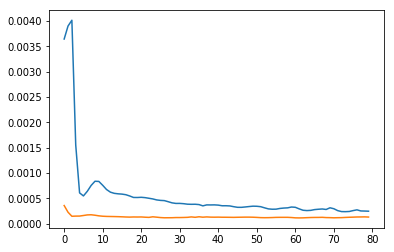

In [182]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

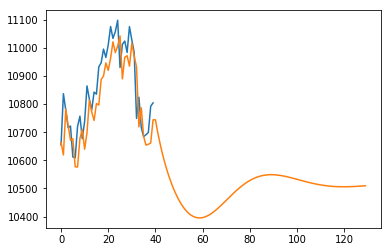

In [183]:
#Xt = model.predict(X_test)
#plt.plot(y_test.reshape(-1,1))
#plt.plot(Xt)
X_test_tmp = X_test.copy()
Xt = model.predict(X_test)
lastRow = X_test_tmp[39,:,0].reshape(-1)
#print(X_test_tmp.shape)
#print(Xt.shape)
#print(X_test_tmp)

for i in range(90):
    newVal = model.predict(lastRow.reshape(1,window_size,1))
    lastRow = np.append(lastRow, newVal[0,0])
    lastRow = np.delete(lastRow, 0)
    Xt = np.append(Xt, newVal[0,0])

plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt.reshape(-1, 1)))

In [184]:
model = Sequential()
model.add(LSTM(config_lstm_size, return_sequences=True, input_shape=(window_size,1)))
model.add(LSTM(config_lstm_size))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
print(X_train.shape)
#Fit model with history to check for overfitting
#history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False,callbacks=[plot])
history = model.fit(X_train,y_train,epochs=config_epochs,validation_data=(X_test,y_test),shuffle=False)

(5851, 30, 1)
Train on 5851 samples, validate on 40 samples
Epoch 1/80
5851/5851 [==============================] - 12s 2ms/step - loss: 0.0036 - val_loss: 4.7185e-04
Epoch 2/80
5851/5851 [==============================] - 9s 1ms/step - loss: 0.0048 - val_loss: 3.3050e-04
Epoch 3/80
5851/5851 [==============================] - 9s 1ms/step - loss: 0.0113 - val_loss: 0.0076
Epoch 4/80
5851/5851 [==============================] - 9s 2ms/step - loss: 0.0119 - val_loss: 0.0044
Epoch 5/80
5851/5851 [==============================] - 9s 1ms/step - loss: 0.0018 - val_loss: 7.4556e-04
Epoch 6/80
5851/5851 [==============================] - 9s 2ms/step - loss: 7.7973e-04 - val_loss: 2.5874e-04
Epoch 7/80
5851/5851 [==============================] - 9s 2ms/step - loss: 7.2340e-04 - val_loss: 1.4873e-04
Epoch 8/80
5851/5851 [==============================] - 9s 1ms/step - loss: 7.0492e-04 - val_loss: 1.2699e-04
Epoch 9/80
5851/5851 [==============================] - 9s 2ms/step - loss: 7.2115e-04 

5851/5851 [==============================] - 9s 2ms/step - loss: 2.8756e-04 - val_loss: 1.3533e-04
Epoch 75/80
5851/5851 [==============================] - 9s 1ms/step - loss: 3.0170e-04 - val_loss: 1.3252e-04
Epoch 76/80
5851/5851 [==============================] - 9s 1ms/step - loss: 3.2753e-04 - val_loss: 1.4383e-04
Epoch 77/80
5851/5851 [==============================] - 9s 1ms/step - loss: 3.3460e-04 - val_loss: 1.4769e-04
Epoch 78/80
5851/5851 [==============================] - 9s 1ms/step - loss: 2.9157e-04 - val_loss: 1.1972e-04
Epoch 79/80
5851/5851 [==============================] - 9s 1ms/step - loss: 2.3314e-04 - val_loss: 1.1479e-04
Epoch 80/80
5851/5851 [==============================] - 9s 1ms/step - loss: 2.3137e-04 - val_loss: 1.1543e-04


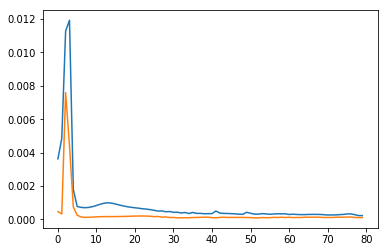

In [185]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

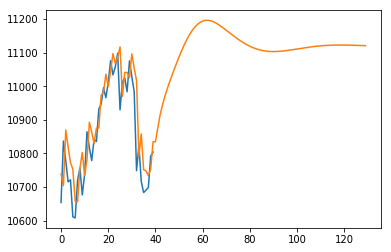

In [186]:
#Xt = model.predict(X_test)
#plt.plot(y_test.reshape(-1,1))
#plt.plot(Xt)
X_test_tmp = X_test.copy()
Xt = model.predict(X_test)
lastRow = X_test_tmp[39,:,0].reshape(-1)
#print(X_test_tmp.shape)
#print(Xt.shape)
#print(X_test_tmp)

for i in range(90):
    newVal = model.predict(lastRow.reshape(1,window_size,1))
    lastRow = np.append(lastRow, newVal[0,0])
    lastRow = np.delete(lastRow, 0)
    Xt = np.append(Xt, newVal[0,0])

plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt.reshape(-1, 1)))

In [187]:
model = Sequential()
model.add(LSTM(config_lstm_size, return_sequences=True, input_shape=(window_size,1)))
model.add(LSTM(config_lstm_size, return_sequences=True))
model.add(LSTM(config_lstm_size))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
#history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False,callbacks=[plot])
history = model.fit(X_train,y_train,epochs=config_epochs,validation_data=(X_test,y_test),shuffle=False)

Train on 5851 samples, validate on 40 samples
Epoch 1/80
5851/5851 [==============================] - 18s 3ms/step - loss: 0.0067 - val_loss: 3.7412e-04
Epoch 2/80
5851/5851 [==============================] - 13s 2ms/step - loss: 0.0147 - val_loss: 0.0029
Epoch 3/80
5851/5851 [==============================] - 14s 2ms/step - loss: 0.0288 - val_loss: 0.0020
Epoch 4/80
5851/5851 [==============================] - 14s 2ms/step - loss: 0.0079 - val_loss: 0.0013
Epoch 5/80
5851/5851 [==============================] - 14s 2ms/step - loss: 0.0019 - val_loss: 3.3854e-04
Epoch 6/80
5851/5851 [==============================] - 14s 2ms/step - loss: 7.3281e-04 - val_loss: 2.2077e-04
Epoch 7/80
5851/5851 [==============================] - 14s 2ms/step - loss: 7.0906e-04 - val_loss: 1.9861e-04
Epoch 8/80
5851/5851 [==============================] - 14s 2ms/step - loss: 7.1330e-04 - val_loss: 1.9945e-04
Epoch 9/80
5851/5851 [==============================] - 14s 2ms/step - loss: 7.1978e-04 - val_loss

5851/5851 [==============================] - 14s 2ms/step - loss: 3.1205e-04 - val_loss: 1.7703e-04
Epoch 75/80
5851/5851 [==============================] - 13s 2ms/step - loss: 3.4328e-04 - val_loss: 1.8219e-04
Epoch 76/80
5851/5851 [==============================] - 13s 2ms/step - loss: 3.4295e-04 - val_loss: 1.7464e-04
Epoch 77/80
5851/5851 [==============================] - 13s 2ms/step - loss: 3.2793e-04 - val_loss: 1.6125e-04
Epoch 78/80
5851/5851 [==============================] - 14s 2ms/step - loss: 3.2001e-04 - val_loss: 1.4622e-04
Epoch 79/80
5851/5851 [==============================] - 13s 2ms/step - loss: 3.3257e-04 - val_loss: 1.3430e-04
Epoch 80/80
5851/5851 [==============================] - 13s 2ms/step - loss: 3.2948e-04 - val_loss: 1.3130e-04


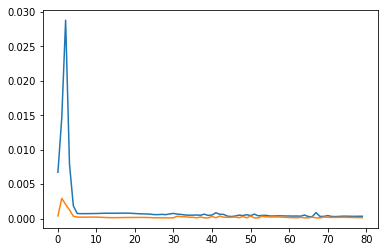

In [188]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

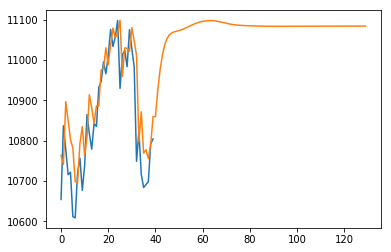

In [189]:
#Xt = model.predict(X_test)
#plt.plot(y_test.reshape(-1,1))
#plt.plot(Xt)
X_test_tmp = X_test.copy()
Xt = model.predict(X_test)
lastRow = X_test_tmp[39,:,0].reshape(-1)
#print(X_test_tmp.shape)
#print(Xt.shape)
#print(X_test_tmp)

for i in range(90):
    newVal = model.predict(lastRow.reshape(1,window_size,1))
    lastRow = np.append(lastRow, newVal[0,0])
    lastRow = np.delete(lastRow, 0)
    Xt = np.append(Xt, newVal[0,0])

plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt.reshape(-1, 1)))